# Gráficos de resultados de aplicação do ToLD-Br em modelos de aprendizagem de máquina

In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
with open("./results_binaria.json", "r", encoding="utf‑8") as f:
    bin_results = json.load(f)

In [4]:
with open("./results_multilabel.json", "r", encoding="utf‑8") as f:
    ml_results = json.load(f)

In [5]:
def plot_metrics(results_dict, title):
    models = list(results_dict.keys())
    metrics = ["accuracy", "precision", "recall", "f1_score"] if "f1_score" in list(results_dict[models[0]].keys()) else ["accuracy", "precision_macro", "recall_macro", "f1_macro"]
    data = {m: [results_dict[m].get(metric, np.nan) for metric in metrics] for m in models}
    df = pd.DataFrame(data, index=metrics).T
    plt.figure(figsize=(10,6))
    sns.barplot(data=df)
    plt.title(title)
    plt.ylabel("Score")
    plt.xticks(rotation=45)
    plt.ylim(0,1)
    plt.legend(metrics)
    plt.tight_layout()
    plt.show()

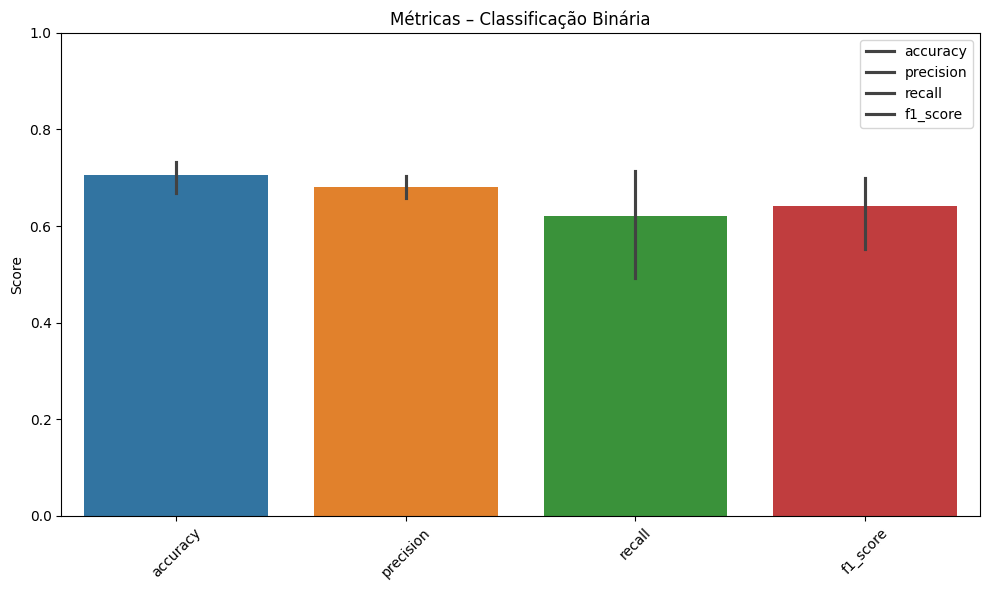

In [6]:
plot_metrics(bin_results, "Métricas – Classificação Binária")

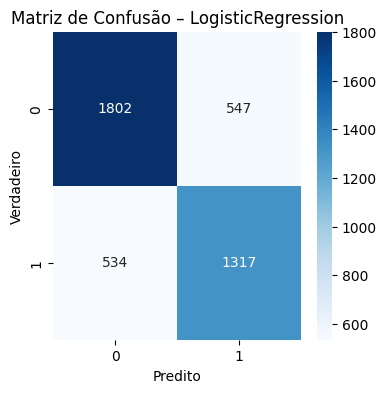

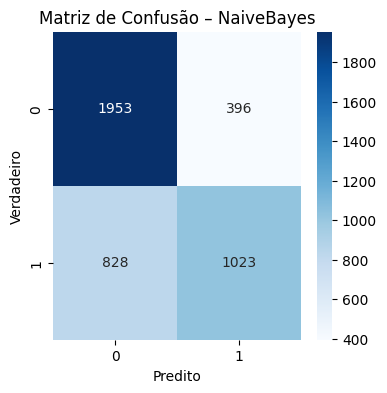

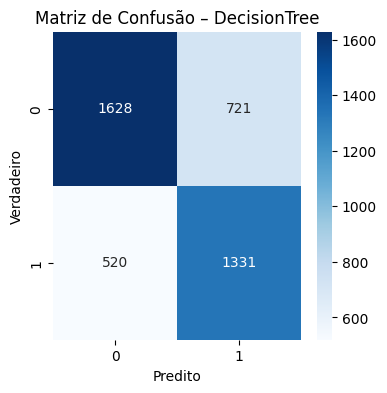

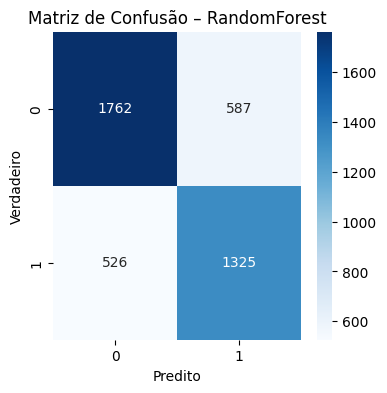

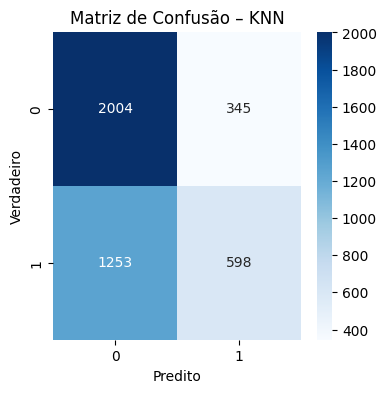

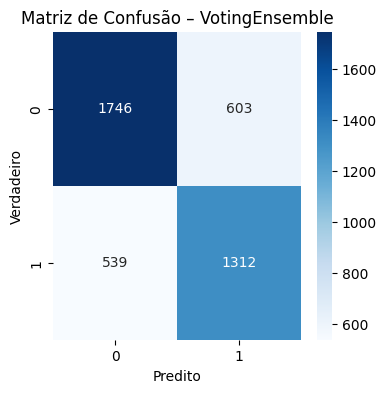

In [7]:
for model, info in bin_results.items():
    cm = np.array(info["confusion_matrix"])
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusão – {model}")
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.show()

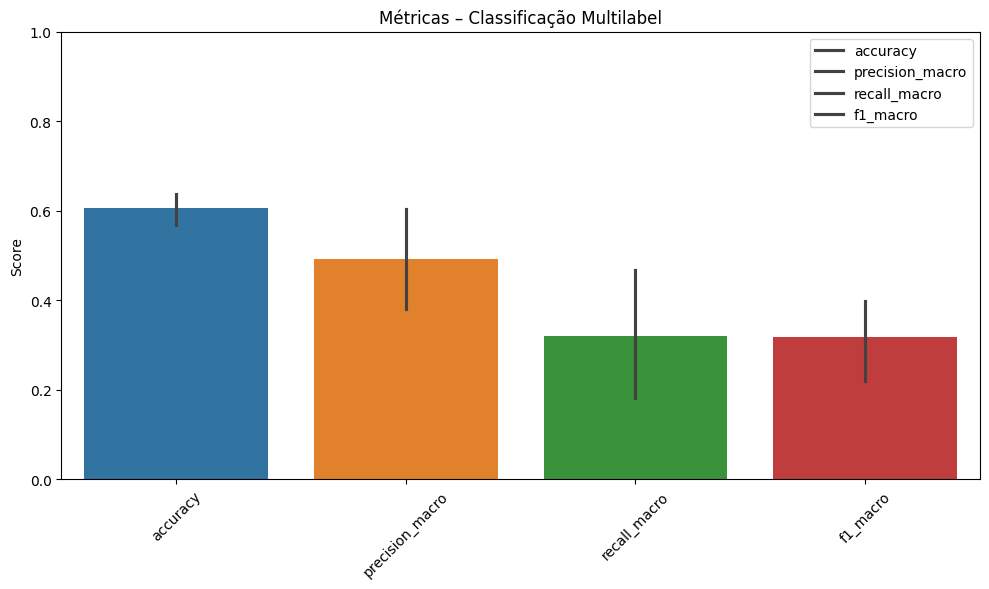

In [8]:
plot_metrics(ml_results, "Métricas – Classificação Multilabel")

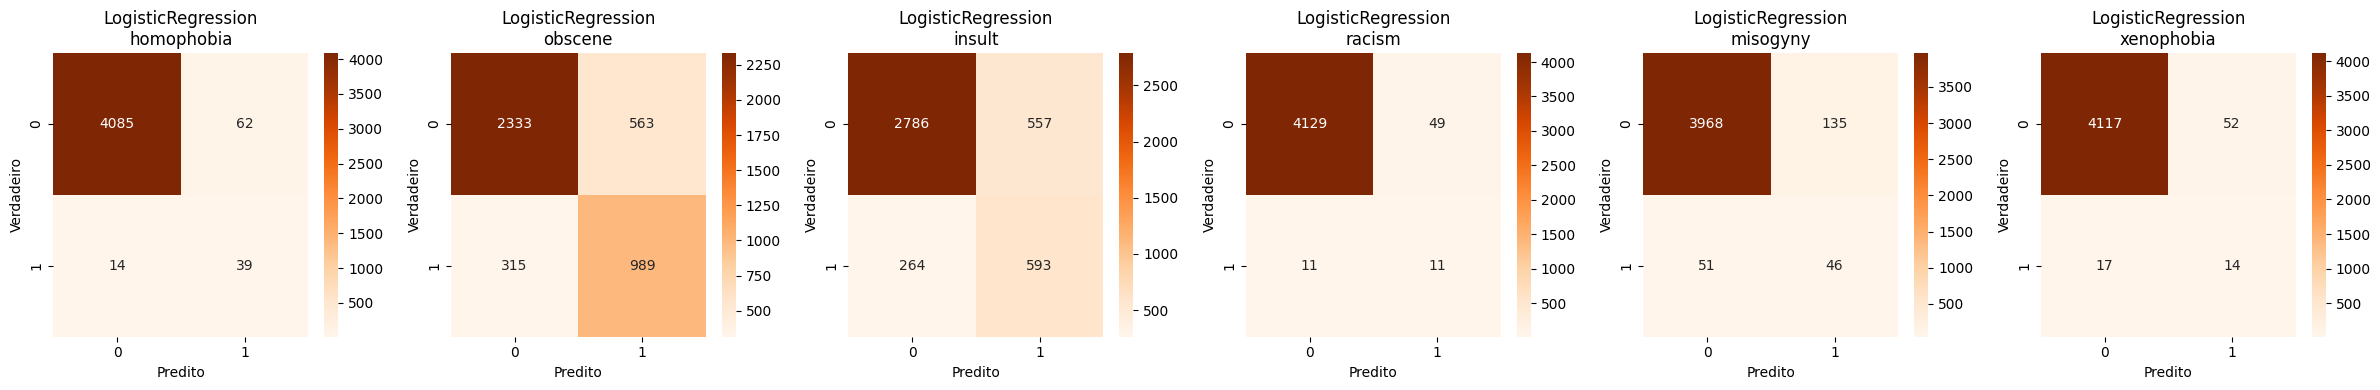

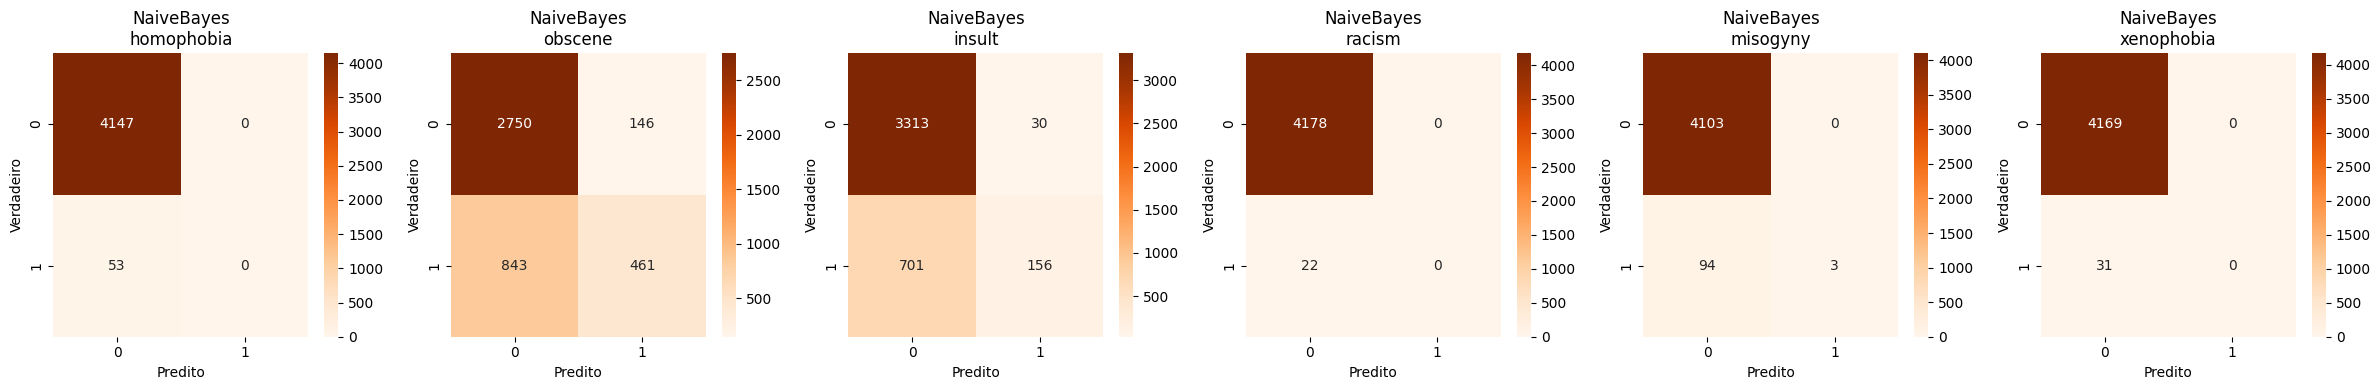

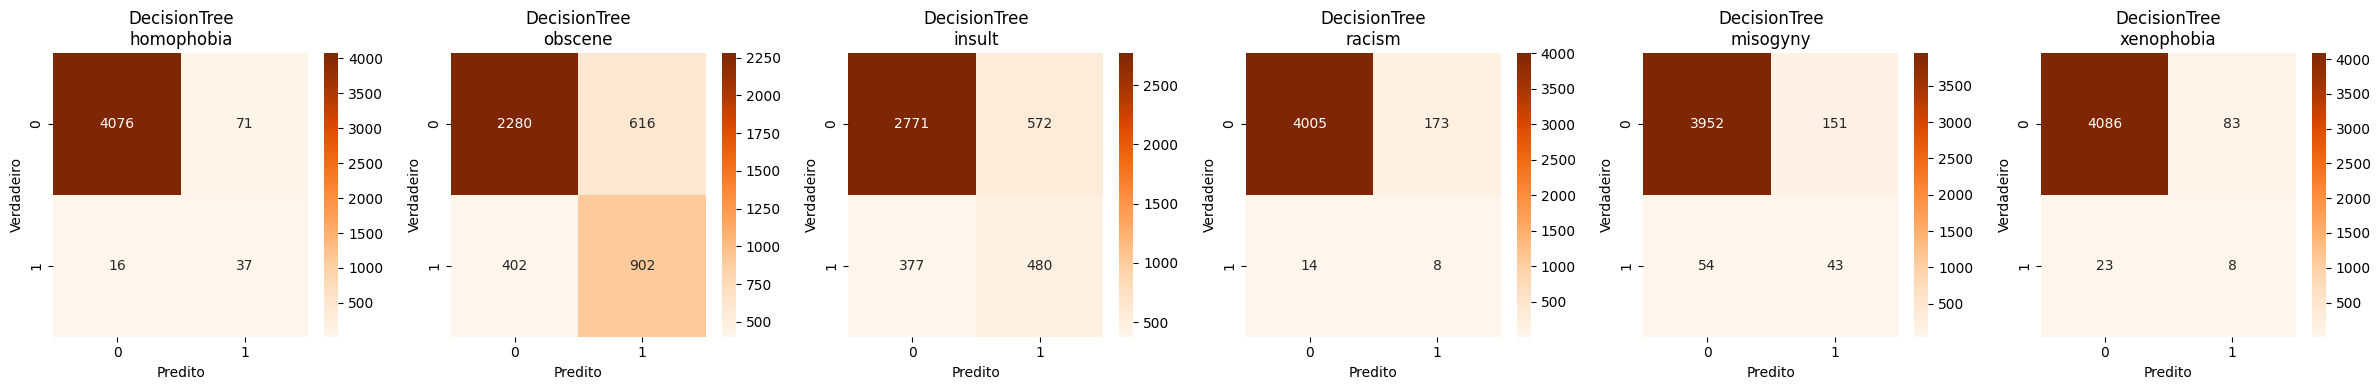

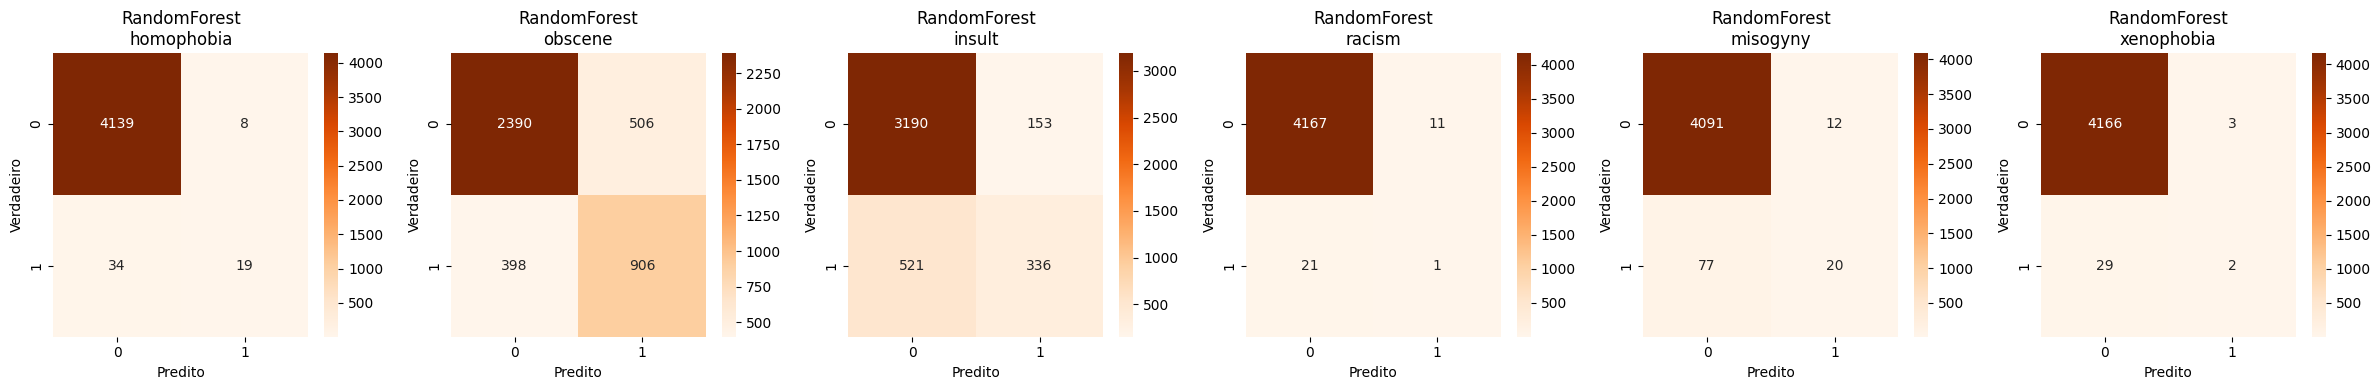

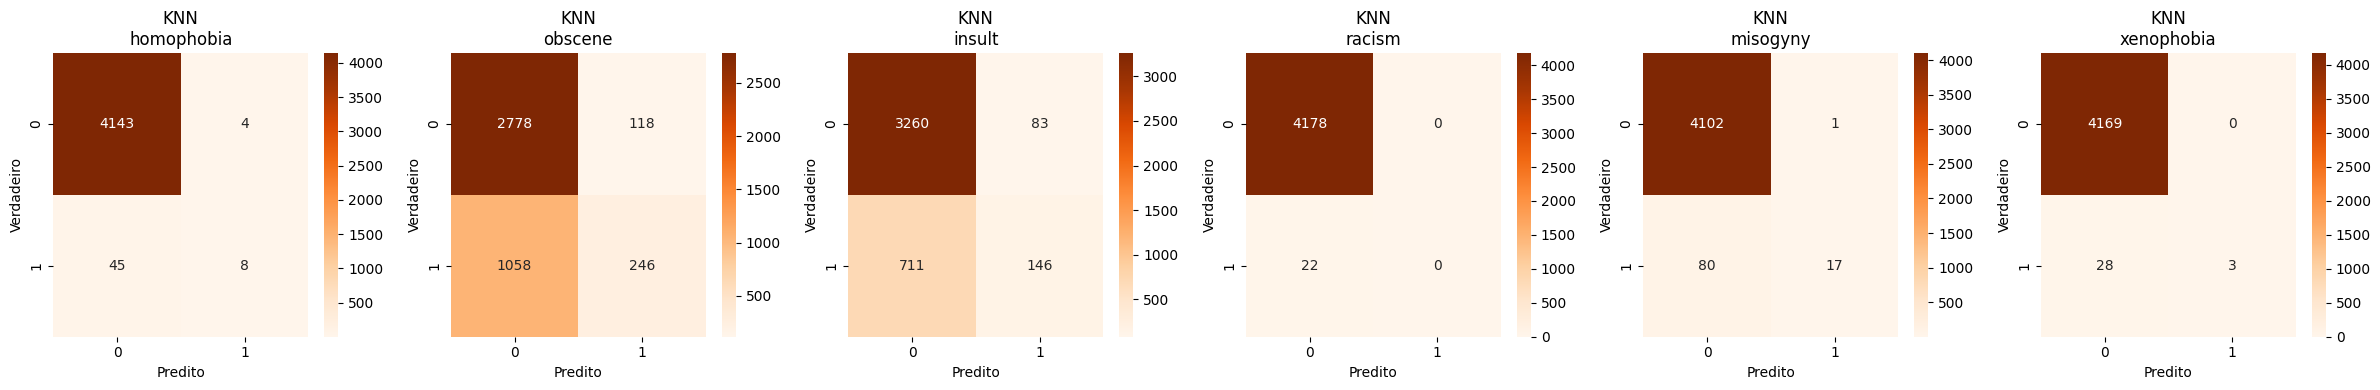

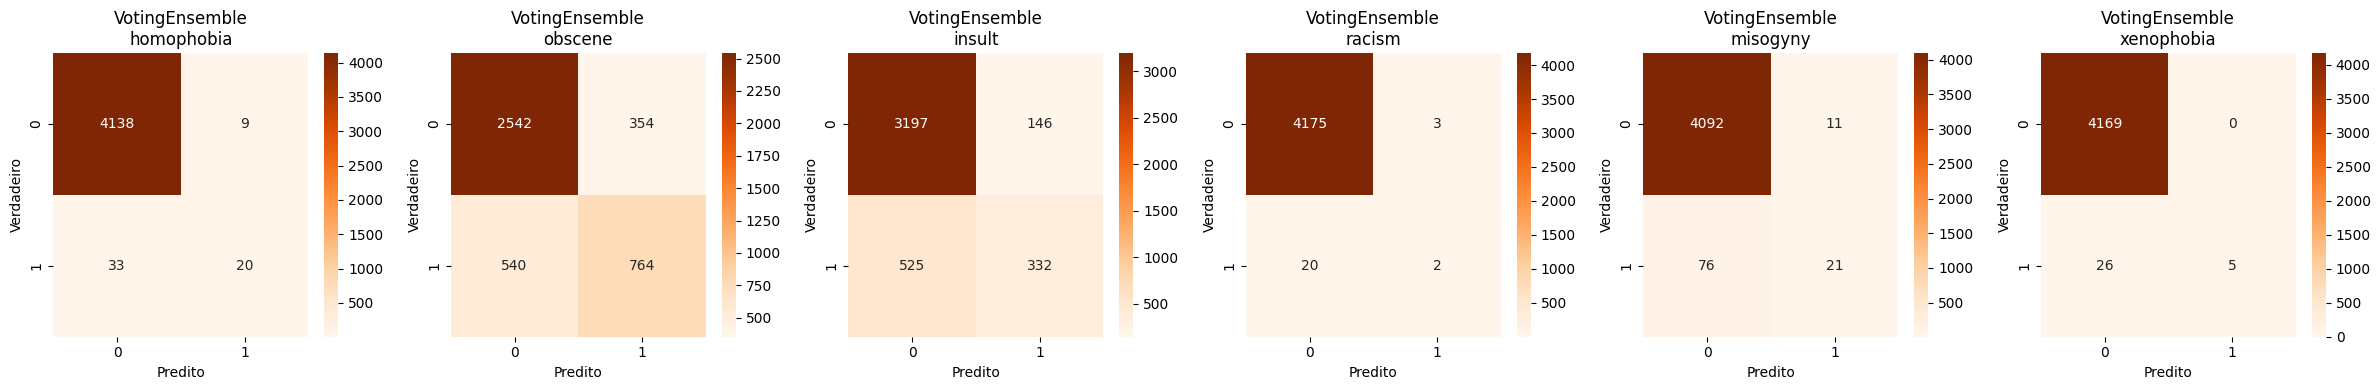

In [9]:
categories = ["homophobia","obscene","insult","racism","misogyny","xenophobia"]
for model, info in ml_results.items():
    cms = info["confusion_matrix_per_class"]
    num_classes = len(cms)
    fig, axes = plt.subplots(1, num_classes, figsize=(4*num_classes,4))
    for i, cm in enumerate(cms):
        cm_arr = np.array(cm)
        ax = axes[i]
        sns.heatmap(cm_arr, annot=True, fmt="d", cmap="Oranges", ax=ax)
        ax.set_title(f"{model}\n{categories[i]}")
        ax.set_xlabel("Predito")
        ax.set_ylabel("Verdadeiro")
    plt.tight_layout()
    plt.show()
